# Bank Marketing Prediction

# i. Introduction  
**Name:** Jenny AT  

**Problem statement:**  
The data is related with direct marketing campaigns of a Portuguese banking institution.  
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required. 
 
**Objective:**  
This project is created to predict if clients would choose ('yes') or not ('no') subscribed to the product (bank term deposit).  
The models used for this prediction are: `Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree and Random Forest`.

# ii. Import Libraries

In [48]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Feature Engineering
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import phik
from sklearn.pipeline import Pipeline
from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import mutual_info_classif

# Import Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Import CrossValidation & Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Import Model Evaluation
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score

# Import Model Inference
import pickle

# Import warning
import warnings
warnings.filterwarnings('ignore')

# iii. Data Loading

In [2]:
# Open & Read Data Source = csv
open('bank-additional-full.csv', 'r')

# Set data as DataFrame
df_ori = pd.read_csv('bank-additional-full.csv', delimiter=';')

# Duplicate data ori
df = df_ori.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We use delimiter during data loading because the data was displayed inappropriately, because the the CSV file uses semicolon (;) instead of a comma (,)

In [3]:
# Checking data -1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Looks like there are no missing values, let's check further:

In [4]:
print(df.isnull().sum())
print(f'{round(df.isnull().mean()*100)}%')

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64%


It's certain that there are no missing values.  
Now let's check for any data duplicates

In [5]:
# Check data duplicate
df.duplicated().sum()

12

Now drop the duplicated datas

In [6]:
# Drop data duplicates
df.drop_duplicates(inplace=True)

In [7]:
# Re-check data duplicate
df.duplicated().sum()

0

Duplicated data removed successfully  

Now we also need to drop 'duration' column because it highly affects the output target (e.g., if duration=0 then y='no'),   
to make a more realistic prediction

In [8]:
# Drop 'duration' column
df.drop('duration', axis=1, inplace=True)

In [11]:
# Re-check 'duration' column drop
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

'duration' column removed successfully

# iv. Exploratory Data Analysis

# v. Data Preprocessing

### Split between X (Features/Variables) and y (Target/Label)

In [9]:
# Split X and y
X = df.drop(['y'], axis=1)

y = df['y']

print(X.columns)
print(y)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')
0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41176, dtype: object


### Split train set and test set

In [10]:
# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=70) 
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3200,41,services,married,basic.9y,no,yes,yes,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
34987,44,management,married,university.degree,no,yes,no,cellular,may,fri,1,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1
13235,45,blue-collar,divorced,basic.4y,no,no,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
26426,50,management,divorced,high.school,unknown,no,no,cellular,nov,thu,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8
27365,55,technician,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8


In [12]:
# Check shape
print('Train-set:',X_train.shape)
print('Test-set:',X_test.shape)

Train-set: (32940, 19)
Test-set: (8236, 19)


## a. Missing value handling

In [13]:
X_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [14]:
y_train.isnull().sum()

0

In [15]:
X_test.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [16]:
y_test.isnull().sum()

0

No missing values detected

## b. Outliers Handling

In [17]:
# Detect categorical colums
X[X.select_dtypes(include=['object']).columns]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [18]:
# Create looping to check distribution numerical dataset

num = X.select_dtypes(exclude=['object']).columns.tolist()

# Create empty list to contain column lists
normal = []
skew = []
extreme = []
for i in num:
    print(f'skewness {i}: {round(X_train[i].skew(),3)}')

    if abs(round(X_train[i].skew(),3)) > 1: 
        extreme.append(i)
    elif abs(round(X_train[i].skew(),3)) > 0.5:
        skew.append(i)
    else:
        normal.append(i)

print(f'normal distribution: {normal}.') 
print('skew distribution:',skew, '.') 
print(f'extreme skew distribution:{extreme}.')

skewness age: 0.775
skewness campaign: 4.807
skewness pdays: -4.951
skewness previous: 3.87
skewness emp.var.rate: -0.723
skewness cons.price.idx: -0.235
skewness cons.conf.idx: 0.298
skewness euribor3m: -0.708
skewness nr.employed: -1.045
normal distribution: ['cons.price.idx', 'cons.conf.idx'].
skew distribution: ['age', 'emp.var.rate', 'euribor3m'] .
extreme skew distribution:['campaign', 'pdays', 'previous', 'nr.employed'].


Based on the results above, the distributed columns are:  
1. Normal (-0.5 to 0.5): `cons.price.idx, cons.conf.idx`    
2. Moderately Skew (-0.5 to-1 atau 0.5 to 1): `age, emp.var.rate, euribor3m`  
3. Extreme Skew (> 1 or < -1) : `campaign, pdays, previous, nr.employed`

### Outlier checking for each distribution type

### Normal check

In [19]:
# Create function for the normal distribution
def calculate_normal_outliers(df, variable):
 
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()
        
    outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
    outliers_percentage = len(outliers) / len(df) * 100
    
    print(f'Outlier {variable} : {len(outliers)}')
    print(f'% Outlier {variable} : {round(outliers_percentage,2)}%')

In [20]:
# Using loop to call normal function
for i in normal:
    calculate_normal_outliers(X_train,i)
    print('')

Outlier cons.price.idx : 0
% Outlier cons.price.idx : 0.0%

Outlier cons.conf.idx : 0
% Outlier cons.conf.idx : 0.0%



There are no outliers in the normally distributed category.  
So no further handling is required.

### Skew & Extreme check

In [21]:
# Create function for skew distributed
def calculate_skewed_outliers(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
    outliers_percentage = len(outliers) / len(df) * 100
    
    print(f'Outlier {variable} : {len(outliers)}')
    print(f'% Outlier {variable} : {round(outliers_percentage,2)}%')

In [22]:
# Using loop to call moderately skew function
for i in skew:
    calculate_skewed_outliers(X_train,i,1.5)
    print('')

Outlier age : 376
% Outlier age : 1.14%

Outlier emp.var.rate : 0
% Outlier emp.var.rate : 0.0%

Outlier euribor3m : 0
% Outlier euribor3m : 0.0%



There is an outlier for the feature 'age', since the outlier is under 5%,  
then it will be handled through trimming.

#### Extreme skew

In [23]:
# Using loop to call extreme skew function
for i in extreme:
    calculate_skewed_outliers(X_train,i,3)
    print('')

Outlier campaign : 863
% Outlier campaign : 2.62%

Outlier pdays : 1199
% Outlier pdays : 3.64%

Outlier previous : 4456
% Outlier previous : 13.53%

Outlier nr.employed : 0
% Outlier nr.employed : 0.0%



Let's check on the 'previous' column due to its outstanding number of outlier percentage

<Axes: >

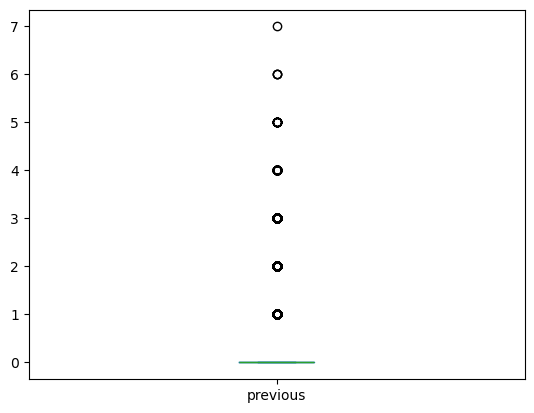

In [24]:
# Visualisasi sederhana
X_train.previous.plot(kind='box')

In [25]:
print(X_train['previous'].unique())

[0 1 2 3 4 5 6 7]


Thus, the outliers for the features 'campaign', 'pdays', and previous' will be handled with trimming.   
Even though its outlier exceeds 5%, the feature 'previous' will not be capped as it is too small in number, 

### Handling with trimming method

In [31]:
Trim_skew_features_list = ['age']
Trim_extreme_skew_features_list = ['campaign', 'pdays', 'previous']

Trim the moderately skewed distribution

In [32]:
def drop_skew_outliers(df, variable,distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    df.drop(df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)].index,inplace=True)

In [33]:
for i in Trim_skew_features_list:
    drop_skew_outliers(X_train,i,1.5)

print(f'Before trim: {X_train.shape}') 

Before trim: (32564, 21)


Trim the extremely skewed distribution

In [34]:
def drop_extreme_skew_outliers(df, variable,distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    df.drop(df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)].index,inplace=True)

In [35]:
for i in Trim_extreme_skew_features_list:
    drop_extreme_skew_outliers(X_train,i,3)

print(f'Before trim: {X_train.shape}') 

Before trim: (27411, 21)


In [36]:
y_train = y_train.loc[X_train.index]

## c. Feature Selection

In [37]:
# Concat features and target to check correlation
corr = pd.concat([X_train,y_train],axis=1)
corr.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'previous_log', 'previous_binned', 'y'],
      dtype='object')

In [38]:
# Check correlation
corr.phik_matrix()['y']

interval columns not set, guessing: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'previous_log', 'previous_binned']


age               0.150761
job               0.125586
marital           0.079333
education         0.072338
default           0.044652
housing           0.007498
loan              0.007266
contact           0.187278
month             0.313537
day_of_week       0.010484
campaign          0.043233
emp.var.rate      0.387362
cons.price.idx    0.244686
cons.conf.idx     0.402754
euribor3m         0.402064
nr.employed       0.287038
y                 1.000000
Name: y, dtype: float64

These numbers look weak, every correlation is under 0.38.  
Drop the features that are under 0.1 = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week', 'campaign', 'cons.price.idx', 'nr.employed']

In [50]:
# Drop unnecessary columns in X_train
X_train.drop(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'cons.price.idx', 'nr.employed'], axis=1, inplace=True)

# Drop unnecessary columns in X_test
X_test.drop(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','day_of_week', 'campaign', 'cons.price.idx', 'nr.employed'], axis=1, inplace=True)

In [53]:
# Check new columns
X_train.columns

Index(['pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx',
       'euribor3m'],
      dtype='object')

In [52]:
# Drop unnecessary columns in X_train
X_train.drop(['previous_log', 'previous_binned'], axis=1, inplace=True)

# Drop unnecessary columns in X_test
X_test.drop(['previous_log', 'previous_binned'], axis=1, inplace=True)

KeyError: "['previous_log', 'previous_binned'] not found in axis"

In [ ]:
# Define a threshold for rare categories
relative_threshold = 0.005 * len(X_train)  # 0.5% of the total rows
relative_threshold = int(relative_threshold)  # Convert to integer

# Calculate the frequency of each category
job_counts = X_train['job'].value_counts()

# Create a list of categories to be replaced by 'Other'
rare_jobs = job_counts[job_counts < relative_threshold].index.tolist()

# Replace rare categories with 'Other'
X_train['job'] = X_train['job'].apply(lambda x: 'Other' if x in rare_jobs else x)

print(X_train['job'].value_counts())